# Exercício Computacional 1 - Aritmética de Ponto Flutuante e Eliminação de Gauss



---




**Data de entrega:** Até 07 de Maio de 2023

**Como entregar:** Enviar o jupyter notebook (arquivo .ipynb) pelo pelo próprio Classroom.


**Leia com atenção:**


*   Você deve fazer obrigatoriamente todas as atividades marcadas com a exclamação❗.
*   Atividades marcadas com 🧩 são opcionais, mas interessantes, podendo ser desafiadoras. 
*   Faça uma cópia do notebook para o seu Google Drive e use o Google Colab para executar o notebook e fazer a tarefa.
*   A atividade vai ser baseada no seu número USP para que as soluções dos alunos fiquem diferentes. 
*   Há questões dissertativas!
*   Siga o passo a passo indicado no tutorial, respondendo às atividades propostas no seu jupyter notebook.
*   O notebook que entregar deve estar 100% funcional, isto é, todos os códigos rodando no Colab sem erros. 
*   Você deverá entregar apenas uma cópia do jupyter notebook (.ipynb) no Classroom, na funcionalidade de "entregar" do Classroom. 
*   Foi estimado um tempo total aproximado de 2-3 horas para realização completa da atividade.
*   Esta tarefa é individual e haverá controle de similaridade. Tentativas de cópias, fraude, compra-venda de EPs não serão toleradas, levando a nota zero na tarefa e posterior análise para medidas cabíveis.
*   ❗Exercício 0:❗ Para mostrar que você leu até aqui, escreva seu nome completo (assinatura) na linha a seguir:





*Assinatura:* Victor Nascimento Pereira



---





Primeiro vamos carregar algumas bibliotecas: Numpy, Scipy Linear Algebra (scipy.linalg), System (sys) e Time (time)

In [1]:
import numpy as np
import scipy.linalg as la 
import sys
import time

Agora vamos definir alguns números especiais ("magic") para cada aluno, com base no seu número USP

In [2]:
# Coloque aqui o seu número USP
nusp = 10773530

Estes números serão importantes para a atividade:

In [3]:
magic_ilong = int(str(nusp).replace("0",""))
magic_ishort = int(str(magic_ilong)[:2])
print("magic_ilong  =", magic_ilong)
print("magic_ishort =", magic_ishort)

magic_ilong  = 177353
magic_ishort = 17




---




## Aritmética de Ponto Flutuante

Começamos esse tutorial discutindo um pouco de aritmética de ponto flutuante, que vamos definir mais adiante.



Algumas referências:

[1]https://en.wikipedia.org/wiki/IEEE_754

[2] https://betterprogramming.pub/floating-point-numbers-are-weird-in-python-heres-how-to-fix-them-51336e4ad51a

[3] https://ironpython-test.readthedocs.io/en/latest/tutorial/floatingpoint.html


A matemática está furada no computador?

In [4]:
a = 10
b = 0.1
c = 0.2

In [5]:
r1 = a*(b + c)
r2 = a*b + a*c

r1 e r2 deveriam ser iguais...Mas...

In [6]:
print(r1 == r2)

False


In [7]:
print(r1, r2)

3.0000000000000004 3.0


A distributiva e associatividade não valem no computador ?!?!

In [8]:
.2 + .2 + .2 == 0.6

False

In [9]:
sum = 0.0
n = 10
for i in range(n):
    sum += 1/n
print(sum)

0.9999999999999999


Vamos tentar entender os motivos partindo bem do princípio: como o computador representa os números!

### Números inteiros no computador

Suponha que tenho apenas 3 bits para representar inteiros (ignore o sinal). Ou seja, temos os números binários
000, 001, 011, 100, 110, ..., 111
que representam respectivamente
0, 1, 2, 3, 4, 5, ..., 7
sendo 7 o maior número que conseguimos representar.

Vejamos isso em Python:

In [10]:
a = 5
b = 6

In [11]:
bin_a=bin(a)
bin_b=bin(b)
print(a, bin_a)
print(b, bin_b)

5 0b101
6 0b110


Os dois números estão bem representados, mas...

In [12]:
print(a+b, bin(a+b))

11 0b1011


isso não é representável em 3 bits (o Python, espertinho, percebeu isso e então colocou mais um bit para representar o número 11...).

Em um computador moderno teríamos 64bits para representar um inteiro, e um sinal para carregar.

Veja aqui mais detalhes: https://prof-thiagooliveira.netlify.app/post/signed-and-unsigned-binary-numbers/

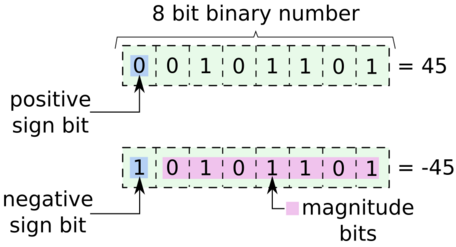



---




#### ❗**Exercício 1**❗

Qual o maior número positivo que podemos representar em inteiros com sinal se tivermos uma representação com magic_ishort bits? Justifique.

In [13]:
#Resposta 
print(magic_ishort)
a=2**16
print(a)

##Com 17 bits, sendo 1 reservado para o sinal, teremos cmo representar, em modulo, ate 2**16, como o 0 faz parte da conta, representamos no maximo o numero 65535.

17
65536




---



E no Python, quantos bits ele usa?

Por "sorte", o Python usa _long int_ e estende a precisão no caso de inteiros se necessário, então é difícil termos problemas com inteiros em Python...Ufa!


### Números "reais" no computador

Agora começa o problema: como o computador representa números reais no computador?

Ele usa o que é conhecido como *ponto flutuante*, que nada mais é que uma padronização da nossa notação científica:




dcd36557db1b343d74991d99aeb50aadce64eb3a.svg

Mas **cuidado**, pois o computador não trabalha com base 10, e sim base 2 (binária), com ponto flutuante. Para facilitar o entendimento de alguns processos, muitos textos adotam a base 10, mas sempre temos que ter em mente que no fundo será usado a base 2.

Em 32 bits, no padrão IEEE-754 temos:


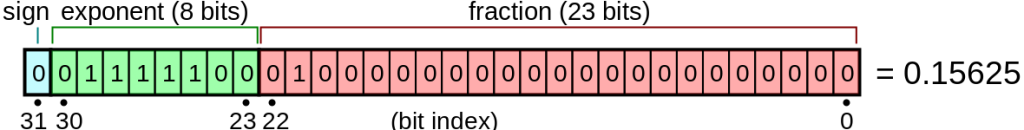

Isto é:


*   1 bit para o sinal (+/-)
*   8 bits para o expoente. Como precisamos de um sinal para o expoente, por convenção o expoente é subtraído por 127, que é 01111111 em binário (em precisão simples, float).
*   23 bits para a fração (mantissa)



*Desafio:* a parte da "fração", que gostaríamos que representasse casas "decimais", precisa ser montada com base binária! Ou seja, muitos números não serão passíveis de serem representados, ou são representados com algum erro. 

Vejam alguns exemplos :





---


**Número "1"** em ponto flutuante é dado, em 32 bits, por:

$\color{blue}{0}\color{green}{01111111}\color{red}{00000000000000000000000}$

onde as cores indicam o $\color{blue}{sinal}$, o $\color{green}{expoente}$,  e a $\color{red}{mantissa}$, respectivamente.

Traduzindo (em binário ainda...):

$ (−1)^\color{blue}{0}×​2^{(\color{green}{01111111} − 01111111)​}\times ​1.\color{red}{00000000000000000000000} $

Traduzindo para decimal:
$(−1)^\color{blue}{0}×​2^{\color{green}{0}}×\color{red}{​1.0} = 1.0 $ (exato!).



---



**Número "0.5"** é só um pouco diferente do 1 em ponto flutuante é dado, em 32 bits:

No computador:
$\color{blue}{0}\color{green}{01111110}\color{red}{00000000000000000000000}$

Binário:
$ (−1)^\color{blue}{0}×​2^{(\color{green}{01111110} − 01111111)​}\times ​1.\color{red}{00000000000000000000000} $

Decimal:
$(−1)^\color{blue}{0}×​2^{\color{green}{-1}}×\color{red}{​1.0} = 0.5$ (exato!).



---


**Número "0.05"** complica, e muito, vejamos:

No computador: $\color{blue}{0}\color{green}{01111010}\color{red}{10011001100110011001101}$

Binário: $ (−1)^\color{blue}{0}×​2^{(\color{green}{01111010} − 01111111)​}\times ​1.\color{red}{10011001100110011001101} $

Decimal:
$(−1)^\color{blue}{0}×​2^{\color{green}{-5}}×1.\color{red}{60000002384185791015625} \approx 0.0500000007450580596923828125​$ - Não conseguimos representar exatamente :-( .


---



Referência: https://float.exposed/0xb3bc8b0f



---


#### ❗**Exercício 2**❗


1.   Qual o maior número representável em Python por aritmética de ponto flutuante no sistema que você está usando? (DICA: use a biblioteca sys.float_info (https://docs.python.org/3/library/sys.html) para saber mais sobre como o seu sistema trabalha com o tipo "float")

2.   O que acontece se chamar em Python um número maior que esse? Ou se fizer uma conta que resulte em um número maior que esse? (Dê um exemplo)

3. Quantos dígitos são bem representados nesse sistema de aritmética de ponto flutuante? (DICA: use o sys.float_info)

4. Qual o resultado da conta 1.0e-23 + 1.0e-23? Justifique.

5. Qual o resultado da conta 1.0 + 1.0e-23? Justifique.

6. Qual o resultado da conta 1.0e+14 + 1.0e-14? Justifique.

7. Leia o tutorial https://docs.python.org/pt-br/3/tutorial/floatingpoint.html e comente por que o computador não consegue representar o número 0.1 exatamente. Qual número aproximado é alocado na memória e usado nas contas?

8.  Escreva o seu número USP como um int em binário.

9.  Escreva o seu número USP como um double float em binário (explicite cada componente, incluindo sinal, mantissa e expoente, da forma: $(−1)^\color{blue}{X}×​2^{(\color{green}{YYYYYYYYY} − 01111111)​}\times ​1.\color{red}{ZZZZZZZZZZZ} $).




In [14]:
# Códigos usados na resposta ilustrando cada caso
# 1.
s = '9876543211234567'
print(float(s))

s = '999999999999999'
print(float(s))

# 2. 
# 3. 

# 4.
a = 1.0e-23
print(a+a)

# 5.
print(1.0+a)

# 6.
a = 1.0e+14
b = 1.0e-14
print(a+b)

# 7. 
from decimal import Decimal
from fractions import Fraction

a=Fraction.from_float(0.1)
print(a)
a=(0.1).as_integer_ratio()
print(a)
a=Decimal.from_float(0.1)
print(a)
format(Decimal.from_float(0.1), '.17')

# 8.
bin(int(nusp))

# 9.
import struct
def binary(num):
    return ''.join('{:0>8b}'.format(c) for c in struct.pack('!f', num))
binary(float(nusp))

9876543211234568.0
999999999999999.0
2e-23
1.0
100000000000000.0
3602879701896397/36028797018963968
(3602879701896397, 36028797018963968)
0.1000000000000000055511151231257827021181583404541015625


'01001011001001000110010000011010'

**Responder aqui com texto as justificativas e observações:**



1.   O exemplo apresenta uma string s de 16 caracteres, e quando colocada para float apresenta erro, pois este representa apenas 15 caracteres, sendo o maior valor possível de ser representado 999999999999999.


2. 
3. Como visto no exemplo anterior, há um erro de aproximação ao chamar um numero alem desse. Como explicado em um, são bem representados 15 digitos.  

4.  
5.  
6.  Primeiramente pode-se comentar o caso de valores proximos, em 4. tem-se a soma de valores pequenos mas próximos, no caso, o mesmo, 
portanto, não há problema na soma que é realizada, ja em 5.0 são somados valores de ordem muito distinta, sendo um irrisório frente o outro, portanto, é apserentada uma aproximação para a soma, no caso 6.0, a distancia eh drastica, é tomada a soma de um valor da ordem 14 frente um valor da ordem -14, sao 28 ordens de grandeza separando os valores, portanto, a aproximação apresentada ignora o segundo valor, e computacionamente falando, o mesmo nao eh contabilizado.

7.  Como visto no codigo retirado do link apresentado, o numero 0.1, assim como seus analogos, é representado computacionalmente por meio de uma fração que o aproxime, neste caso, 3602879701896397/36028797018963968, que tem nominador e denominador de 17 algarismos, para representar com o maximo de precisao possivel o valor requerido, o valor computacional é tambem expresso de forma mais aproximada no codigo apresentado.

8.  0b101001000110010000011010

9.  01001011001001000110010000011010

forma: $(−1)^\color{blue}{0}×​2^{(\color{green}{100010101} − 01111111)​}\times ​1.\color{red}{01001000110010000011010} $).







---


### Simulando aritmética de ponto flutuante

Uma forma de simular a aritmética de ponto flutuante em diferentes tipos de computadores, com mais ou menos "bits" para representação numérica, é considerando o número de **algarismos significativos**.

Dada uma "máquina" com uma certa precisão, definimos o número de **algarismos significativos** como sendo o número de casas decimais, ou dígitos, que o computador consegue representar depois de transformado em notação científica.

Ex: Escreva os números na notação científica com 0,AAAAA x 10^B e verifique que

1000000 : possui 1 alg. sig.

0.00001 : possui 1 alg. sig.

1.00001 : possui 6 alg. sig.

0.12345 : possui 5 alg. sig.

Qualquer conta realizada deve ser ajustada (arredondada) no final para ficar nessa representação!



**Cuidado!** 

Essa representação com algarismos significativos na base 10 é uma simplificação para fins didáticos, pois lembre-se que o computador trabalha com base 2.





#### ❗**Exercício 3**❗

1.   Quantos algarismos significativos são necessários para representar o seu 
número USP na forma de um *float* em base 10? Justifique.

2.  Divida o seu número USP por 17. Represente o número resultante com aritmética de ponto flutuante com 5 algarismos significativos na base 10, arredondando se necessário.



In [15]:
#Código para resposta
print(nusp/17)

633737.0588235294


**Resposta:**


1. 10773530, no caso do meu nusp, são necessários 7 algarismos significativos para representa-lo com exatidao na base 10.

---
2. 633740.0


---




Para saber esse número de algarismos (dígitos) significativos na sua máquina, use:

In [16]:
print(sys.float_info.dig)

15


Em Python, podemos simular esses arredondamentos a cada operação usando a seguinte função:

In [17]:
!pip install sigfig
from sigfig import round


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Um computador com 16bit tem 3 algarismos significativos (10 bits de mantissa)

(precisão conhecida como "half precision float")


Um exemplo tentando calcular $\tan(\pi/2-0.001)$ numericamente:

In [18]:
# Computador de 16 bits (3 alg. sig.)
dig = 3

# Números em precisão dupla (64 bits)
# Python usa IEEE-754 double precision float
pi_double = np.pi
tan_double = np.tan(pi_double/2.0-0.001) #deveria ser bem grande!
print("Precisão dupla: ", pi_double, tan_double)

# Números em precisão "meia" (16 bits) simulada
# Todas as operações devem ser arredondadas!
pi_half = round(pi_double, dig)
tan_half = round(np.tan(round(round(pi_half/2.0,dig)-0.001,dig)), dig) #deveria ser bem grande!

print("Precisão meia :", pi_half, tan_half)


Precisão dupla:  3.141592653589793 999.9996666666933
Precisão meia : 3.14 1260.0




---



## Resolvendo Sistemas Lineares - Eliminação Gaussiana

### O problema 

$$ Ax=b $$

Para os problemas a seguir, você deve usar uma matriz especial, construída conforme o código abaixo. Há 3 parâmetros importantes na geração da matriz:

* **n** : o tamanho da matriz
* **magic_ilong** : o seu número mágico, que fará sua matriz ser única
* **cond_pow** : Um número inteiro que quando maior, torna o sistema mais difícil de ser resolvido, por estar mais propenso a erros de arredondamento. Este número será usado na contrução do *número de condição* da matriz gerada (https://pt.wikipedia.org/wiki/N%C3%BAmero_de_condicionamento). 

In [19]:
# Sistema linear para testes - específica para cada aluno
# ------------------------------------------------------------
# Entrada:
#  n: tamanho da mtriz
#  magic_ilong: seed de geração de números aleatórios
#  cond_pow : potência usada na definição do número de condição (inteiro positivo)
#
# Saída:
#   A: Matrix do sistema linear Ax=b
#   b: lado diretiro do sistema Ax=b
#   a: matriz aumentada [A|b]
def meu_sistema_linear(n=100, magic_ilong=magic_ilong, cond_pow=8):


  # Tamanho do sistema
  #n = 20

  np.random.seed(magic_ilong)

  # Gera matriz aleatória com número de condição alto usando decomposição QR
  cond = np.log(10**cond_pow) # Numero de condição    8 * ln10
  exp_vec = np.arange(-cond/4., cond * (n + 1)/(4 * (n - 1)), cond/(2.*(n-1)))[:n]
  s = np.exp(exp_vec)
  S = np.diag(s)
  U, _ = la.qr((np.random.rand(n, n) - 5.) * 200)
  V, _ = la.qr((np.random.rand(n, n) - 5.) * 200)
  A = U.dot(S).dot(V.T)
  A = A.dot(A.T) #Simétrica

  #Vetor b - vamos gerar b tal que a solução seja sempre um vetor com 1
  x = np.ones((n))
  b = A@x
  

  #Matrix aumentada aleatória a=[A|b]
  a = np.c_[A,b]

  np.set_printoptions(precision=3, suppress=True)
  #print("A:" , A[:10, :10]) #imprimir só o começo da matriz
  #print()
  #print("b:", b[:10]) #imprimir só o começo do vetor b
  #print()
  #print("a:", a) #imprimir a matriz aumentada

  return A, b, a

In [20]:
np.log(10**8)

18.420680743952367

#### 🧩 *Reflexão*

Você consegue explicar como essa matriz é gerada e discutir suas propriedades a partir desse código?



---



---



O algoritmo clássico, conforme visto em aula:

In [21]:
# Método Clássico de Eliminação Gaussiana
#
# O método recebe como entrada uma matrix aumentada a=[A|b], 
# com dimensões n linhas por n+1 colunas, tendo b na última
#
# O método retorna a solução do sistema linear Ax=b, 
#            ou um erro quando isso não for possível
def elim_gauss(a_orig):
  #Faço uma cópia, para não estragar a matriz original
  a = np.copy(a_orig)

  #Número de linhas e colunas
  n,m = a.shape

  # Vetor da solução
  x = np.empty((n))
  
  #Verifica se usuário forneceu uma matriz no formato certo
  if m != n+1 :
    print("Essa matriz não tem dimensões adequadas:", n, m)
    return x

  # Escalonamento
  for i in range(n):
      if a[i,i] == 0.0:
          print('Ainda não implementei pivotamento :-( ')
          return x
          
      for j in range(i+1, n):
          ratio = a[j,i]/a[i,i]
          for k in range(n+1):
              a[j,k] = a[j,k] - ratio * a[i,k]

  # Substituição
  x[n-1] = a[n-1,n]/a[n-1,n-1]

  for i in range(n-2,-1,-1):
      x[i] = a[i,n]
      
      for j in range(i+1,n):
          x[i] = x[i] - a[i,j]*x[j]
      
      x[i] = x[i]/a[i,i]

  return x

Vamos fazer um teste com uma matriz aleatória especial

Vamos testar o nosso esquema usando uma matriz com gerada com parâmetros:

* n = 300

In [22]:
start_time = time.time()
A, b, a = meu_sistema_linear(300, magic_ilong)
x = elim_gauss(a)
tempo_orig = time.time() - start_time
print()

print("Solução", x[:10]) #imprime só alguns elementos da solução
print("\n\nResíduo max|b-Ax|: ", np.max(np.abs(b-A@x)), " Tempo que levou: ", tempo_orig, " segundos")



Solução [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


Resíduo max|b-Ax|:  2.6716406864579767e-12  Tempo que levou:  15.670334815979004  segundos


**Desafios**


*   Esse método que implementamos parece funcionar, mas está muito lento! Como podemos melhorar a sua performance?

*   O resíduo parece bem grande, por que não está mais perto de 10e-16? (que seria o erro de arredondamento esperado para uma aritmética de ponto flutuante com 64 bits (double float)).

Vamos discutir esses dois pontos a seguir.



###Versão vetorizada do método de eliminação Gaussiana

Python é uma linguagem "interpretada", então cada linha é lida e executada individualmente, sem qualquer otimização para eficiência. Isso faz com que "loops" (for) em Python sejam bem lentos.

Podemos otimizar códigos em Python evitando loops em Python puro, por exemplo usando vetores do Numpy. A biblioteca Numpy é uma biblioteca pré-compilada e otimizada para operações de álgebra linear, portanto, quando usamos sua aritmética estamos usando recursos computacionais de forma eficiente.

Mais informações no tutorial: https://drive.google.com/file/d/1yrt5UgeYgyZdAcTmqFUJkWmOBgfoe4SP/view?usp=sharing

Vejamos 2 pequenas mudanças no código de eliminação Gaussiana:

In [23]:
# Método Clássico de Eliminação Gaussiana com vetorização
#
# O método recebe como entrada uma matrix aumentada a=[A|b], 
# com dimensões n linhas por n+1 colunas, tendo b na última
#
# O método retorna a solução do sistema linear Ax=b, 
#            ou um erro quando isso não for possível
def elim_gauss_vet(a_orig):
  #Faço uma cópia, para não estragar a matriz original
  a = np.copy(a_orig)
  
  #Número de linhas e colunas
  n,m = a.shape

  # Vetor da solução
  x = np.empty((n))
  
  #Verifica se usuário forneceu uma matriz no formato certo
  if m != n+1 :
    print("Essa matriz não tem dimensões adequadas:", n, m)
    return x

  # Escalonamento
  for i in range(n):
      if a[i,i] == 0.0:
          print('Ainda não implementei pivotamento :-( ')
          return x
          
      for j in range(i+1, n):
          ratio = a[j,i]/a[i,i]
          #Vetorizei aqui!
          #for k in range(n+1):
          #    a[j,k] = a[j,k] - ratio * a[i,k]
          a[j,:] = a[j,:] - ratio * a[i,:]

  # Substituição
  x[n-1] = a[n-1,n]/a[n-1,n-1]

  for i in range(n-2,-1,-1):
      #Vetorizei aqui!
      #x[i] = a[i,n]
      #for j in range(i+1,n):
      #    x[i] = x[i] - a[i,j]*x[j]
      #x[i] = x[i]/a[i,i]
      x[i] = (a[i,n] - np.dot(a[i,i+1:n], x[i+1:n]))/a[i,i]
      
  return x

Testando com a mesma matriz de antes:

In [24]:
start_time = time.time()
x_vet = elim_gauss_vet(a)
tempo_vet = time.time() - start_time
print("Solução:", x_vet[:10]) #imprime só alguns elementos da solução
print("Resíduo max|b-Ax|: ", np.max(np.abs(b-A@x_vet)), " Tempo que levou: ", tempo_vet, " segundos")
print()
print("Aceleração em relação ao método sem vetorização:", tempo_orig/tempo_vet, " vezes mais rápido")
print("Diferença máxima na solução:", np.max(np.max(x-x_vet)))

Solução: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Resíduo max|b-Ax|:  1.9326762412674725e-12  Tempo que levou:  1.2258338928222656  segundos

Aceleração em relação ao método sem vetorização: 12.783408019418381  vezes mais rápido
Diferença máxima na solução: 5.995204332975845e-15


Observações:



*   O método ficou muito mais rápido!
*   A solução não ficou idêntica à solução anterior, pois a ordem das contas mudou um pouco, e portanto temos pequenos erros de arredondamento se acumulando de formas diferentes.



### Dá para vetorizar mais?

Uma forma é mudar um pouco o algoritmo. Vejamos um algoritmo de decomposição LU (que vai servir de base para Elim. Gaussiana vetorial): Algoritmo de Crout (ou Doolittle, dependendo de onde colocamos a diagonal unitária).

O problema agora é resolver

$$ Ax=LUx=b $$


In [25]:
# Método Clássico de Eliminação Gaussiana via decomposição LU
#
# O método recebe como entrada uma matrix A (n x n) e o vetor b (n x 1), 
#
# O método retorna a solução do sistema linear Ax=b, 
#            ou um erro quando isso não for possível
# Devolve tambem as matrizes L e U da decomposição A=LU
def elim_gauss_LU(A, b):
  #Número de linhas e colunas
  n,m = A.shape

  # Vetor da solução
  x = np.empty((n))
  
  #Verifica se usuário forneceu uma matriz no formato certo
  if m != n :
    print("Essa matriz não tem dimensões adequadas:", n, m)
    return x

  #Guardo tanto L quanto U em uma única matriz!!!!
  LU = np.eye(n) #Matriz identidade

  # @ faz multiplicação de matrizes usando numpy
  for i in range(n):
      if LU[i,i] == 0.0:
          print('Ainda não implementei pivotamento :-( ')
          return x
      #Varre linhas superiores (Upper)
      LU[i,i:] = A[i,i:]-LU[i,:i] @ LU[:i,i:]
      #Varre colunas inferiores (Lower)
      LU[(i+1):,i] = ( A[(i+1):,i]- LU[(i+1):,:i] @ LU[:i,i] ) / LU[i,i]


  # Substituição
  # LUx=b =>  Ly=b,  Ux=y
  y = np.zeros(n)
  # Ly=b
  y[0] = b[0]
  for i in range(1,n,1):
      #Vetorizei aqui!
      y[i] = (b[i] - np.dot(LU[i,:i], y[:i]))

  # Ux=y
  x = np.zeros(n)
  x[n-1] = y[n-1]/LU[n-1,n-1]
  for i in range(n-2,-1,-1):
      #Vetorizei aqui!
      x[i] = (y[i] - np.dot(LU[i,i+1:], x[i+1:]))/LU[i,i]

  #Forma matrizes L e U, tais que A=LU
  U = np.triu(LU) # Pega só triangular superior
  L = np.tril(LU) # Pega só triangular inferior
  np.fill_diagonal(L, 1.0) # Preenche com 1 a diagonal inferior
  return x, L, U

Testando:

In [26]:
start_time = time.time()
x_LU, L, U = elim_gauss_LU(A, b)
tempo_LU = time.time() - start_time
print("Solução:", x_LU[:10]) #imprime só alguns elementos da solução
print("Resíduo max|b-Ax|: ", np.max(np.abs(b-A@x_LU)), " Tempo que levou: ", tempo_LU, " segundos")
print()
print("Aceleração em relação ao método sem vetorização:", tempo_orig/tempo_LU, " vezes mais rápido")
print("Diferença máxima na solução:", np.max(np.max(x-x_LU)))
print('\nTeste LU: ')
print(np.max(np.max(np.abs(L@U-A))))

Solução: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Resíduo max|b-Ax|:  2.5011104298755527e-12  Tempo que levou:  0.05693316459655762  segundos

Aceleração em relação ao método sem vetorização: 275.2408886283214  vezes mais rápido
Diferença máxima na solução: 1.7083549019858424e-09

Teste LU: 
1.0231815394945443e-12


Impressionante a diferença de performance, não? ;-)







---



#### 🧩*Desafio Opcional*

Você consegue usar essa ideia do LU para fazer diretamente a solução do sistema linear vetorial, com apenas um loop, sem precisar calcular L e U explicitamente como fizemos?



---



## E a precisão das contas?

#### ❗**Exercício 4**❗

Implemente uma versão análoga à apresentada no primeiro código de eliminação de Gauss (a função elim_gauss()), mas que agora arredonde cada operação feita para um certo número de algarismos significations.

Para tanto, use round(número, sigfigs) após cada conta que realizar no algoritmo. TODAS as contas de +-*/ devem ser sempre arredondadas!

Coloque sua implementação no espaço abaixo, 

In [27]:
# Método Clássico de Eliminação Gaussiana com aritmética de ponto flutuante restrita
#
# O método recebe como entrada uma matrix aumentada a=[A,b] referente ao 
#    sistema linear Ax=b, com A (n x n) e o vetor b (n x 1), 
# O método recebe também o número de algarismos significativos a serem usados nas contas
#
# O método retorna a solução do sistema linear Ax=b, 
#            ou um erro quando isso não for possível
def elim_gauss_precisao_reduzida(a_orig, sigfig=3):
  
  #Faço uma cópia, para não estragar a matriz original
  a = np.copy(a_orig)
  #Número de linhas e colunas
  #Número de linhas e colunas
  n,m = a.shape

  # Vetor da solução
  x = np.empty((n))
  
  #Verifica se usuário forneceu uma matriz no formato certo
  if m != n+1 :
    print("Essa matriz não tem dimensões adequadas:", n, m)
    return x

  # Escalonamento
  for i in range(n):
      if a[i,i] == 0.0:
          print('Ainda não implementei pivotamento :-( ')
          return x
          
      for j in range(i+1, n):
          ratio = round(a[j,i]/a[i,i], sigfig)
          for k in range(n+1):
              a[j,k] = round(a[j,k] - round(ratio * a[i,k], sigfig), sigfig)

  # Substituição
  x[n-1] = round(a[n-1,n]/a[n-1,n-1])

  for i in range(n-2,-1,-1):
      x[i] = a[i,n]
      
      for j in range(i+1,n):
          x[i] = round(x[i] - a[i,j]*x[j])
      
      x[i] = round(x[i]/a[i,i])

  return x



---




Teste o seu código considerando a sua matriz aleatória anterior variando o número de algarismos significativos de 4 até 16. 

*    Use como tamanho da matriz pelo menos $n\geq 20$
*    Monte uma tabela, ou gráfico, com o erro máximo da solução obtida em relação a solução obtida com precisão máxima do Python (o "x" obtido com algoritmo original, sem arredondamentos).
*   Qual a razão de caimento do erro quando aumentamos 1 algarismo significativo (aproximadamente)?




In [28]:
# Coloque seu código aqui

import warnings
warnings.simplefilter("ignore")

start_time = time.time()
A, b, a = meu_sistema_linear(20, magic_ilong)
x = elim_gauss(a)
tempo_orig = time.time() - start_time
print()

print("Solução", x[:10]) #imprime só alguns elementos da solução
print("\n\nResíduo max|b-Ax|: ", np.max(np.abs(b-A@x)), " Tempo que levou: ", tempo_orig, " segundos")

def func (sigfig):
    start_time = time.time()
    A, b, a = meu_sistema_linear(20, magic_ilong)
    x = elim_gauss_precisao_reduzida(a, sigfig)
    tempo_orig = time.time() - start_time
    print()
    erromax = np.max(np.abs(b-A@x))
    print("Solução", x[:10]) #imprime só alguns elementos da solução
    print("\n\nResíduo max|b-Ax|: ", erromax, " Tempo que levou: ", tempo_orig, " segundos")

    return erromax  
erro = [0]*13
for i in range(4,17):
    erro[i-4]=func(i)


Solução [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


Resíduo max|b-Ax|:  4.547473508864641e-13  Tempo que levou:  0.03333854675292969  segundos
Ainda não implementei pivotamento :-( 

Solução [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


Resíduo max|b-Ax|:  0.0  Tempo que levou:  1.9094340801239014  segundos

Solução [ 0.043  0.006 -0.052  0.058  0.119 -0.042 -0.091  0.022  0.101 -0.004]


Resíduo max|b-Ax|:  0.004552100040214668  Tempo que levou:  1.0270254611968994  segundos

Solução [-0.084 -0.111  0.046  0.071  0.062 -0.026  0.012 -0.011  0.028  0.033]


Resíduo max|b-Ax|:  0.0009339109701755888  Tempo que levou:  1.0512454509735107  segundos

Solução [1.018 0.879 0.55  0.874 0.784 0.693 0.514 0.802 0.76  0.872]


Resíduo max|b-Ax|:  0.0004945486261931364  Tempo que levou:  1.3628160953521729  segundos

Solução [0.902 0.908 0.928 0.903 0.915 0.913 0.944 0.918 0.918 0.904]


Resíduo max|b-Ax|:  6.870013612569892e-05  Tempo que levou:  1.132744550704956  segundos

Solução [0.983 0.984 0.995 0.992 0.991 0.

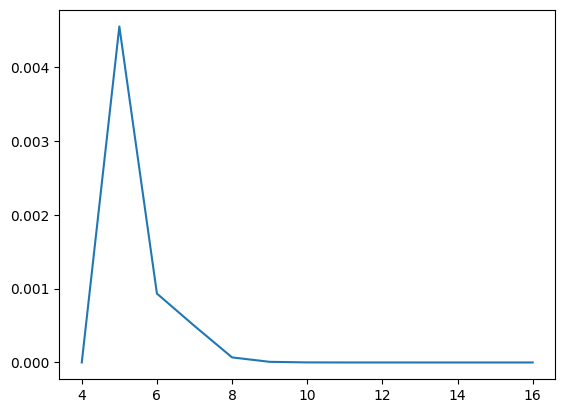

In [29]:
#Gráficos

import matplotlib.pyplot as plt
x = np.linspace(4, 16, 13)
plt.plot(x, erro)

plt.show()

Discuta aqui o que observou dos resultados: foi observada uma variação entre a precisao dos resultados entre o uso de 4 a 7 algarismos sifnificativos, provavelmente proveniente dos arredondamentos utilizados, porém, a partir dai, os erros se tornaram muito menores, se aproximando de zero.




---



## Pivotamento Parcial: Melhorando a precisão permutando linhas

A *condensação pivotal parcial* consiste em escolher como pivô, a cada passo do escalonamento, o elemento na coluna-pivô (da diagonal principal para baixo) com maior valor absoluto, de modo que todos os multiplicadores tenham módulo menor ou igual a 1. 

O algoritmo consiste na seguinte estratégia:
1. Na eliminação de Gauss o pivô é termo da diagonal que será usado como divisor para chegarmos no multiplicador. Queremos que o pivô usado para construção do multiplicador seja o maior possível, para que o multiplicador seja menor que 1.
2. A cada nova coluna que vou escalonar (digamos que seja a coluna j, com o pivô sendo $a_{jj}$), verifico o valor em módulo dos elementos abaixo do pivô (elementos $a_{kj}$, $k\geq j$). Escolho a linha ($k$) que tem o elemento com maior valor em módulo, e troco com a linha principal ($j$), isto é, troco a linha j com a k.  
3. Prossigo com a estratégia usual de escalonamento com a matriz com as linhas trocadas. Note que solução do sistema não é alterada pela troca de linhas. Além disso, note ainda que não "estragamos" o escalonamento anterior, pois sempre trocamos com linhas abaixo do pivô.

Para mais detalhes, veja a video-aula https://drive.google.com/file/d/1h2UJUaQvEYR7mO00fiJoihJmeTwv42BU/view?usp=sharing.



---



#### ❗**Exercício 5**❗

Implemente uma modificação do seu algoritmo de eliminação de Gauss com precisão reduzida agora considerando um pivotamento parcial, trocando as linhas nas etapas do escalonamento de forma a sempre obter um multiplicador em módulo menor que 1. 

Aproveite e inclua no seu código uma condição para dizer se o sistema tem determinante nulo ou não.

Repita o teste feito anteriormente e comente sobre o que observou a respeito do erro obtido.

In [30]:

# Método Clássico de Eliminação Gaussiana com aritmética de ponto flutuante restrita
#    e condensação pivotal parcial
#
# O método recebe como entrada uma matrix aumentada a=[A,b] referente ao 
#    sistema linear Ax=b, com A (n x n) e o vetor b (n x 1), 
# O método recebe também o número de algarismos significativos a serem usados nas contas
#
# O método retorna a solução do sistema linear Ax=b, 
#            ou um erro quando isso não for possível

def elim_gauss_pivot_precisao_reduzida(a_orig, sigfig=3):
    ## COLOQUE AQUI O SEU CÓDIGO
    #Faço uma cópia, para não estragar a matriz original
    a = np.copy(a_orig)
    #Número de linhas e colunas
    n,m = a.shape
    l = np.zeros(n)

    # Vetor da solução
    x = np.empty((n))

    #Verifica se usuário forneceu uma matriz no formato certo
    if m != n+1 :
        print("Essa matriz não tem dimensões adequadas:", n, m)
        return x

    # Escalonamento
    for i in range(n):
        if a[i,i] == 0.0:
            print('Determinante nula')
            return x
        else:
            amax = a[i,i]
            ind = i
            for j in range (i+1, n):
                if abs(a[j][i]) > abs(amax):
                    amax = a[j][i]
                    ind = j
            if ind != i:
                l = np.copy(a[i])
                a[i] = a[ind]
                a[ind] = l
            for j in range (i+1, n):
                ratio = round(a[j,i]/a[i,i], sigfig)
                for k in range(n+1):
                    a[j,k] = round(a[j,k] - round(ratio * a[i,k], sigfig), sigfig)
    
    # Substituição
    x[n-1] = round(a[n-1,n]/a[n-1,n-1])

    for i in range(n-2,-1,-1):
        x[i] = a[i,n]
        
        for j in range(i+1,n):
            x[i] = round(x[i] - a[i,j]*x[j])
        
        x[i] = round(x[i]/a[i,i])

    return x



Solução [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


Resíduo max|b-Ax|:  4.547473508864641e-13  Tempo que levou:  0.0050008296966552734  segundos
Ainda não implementei pivotamento :-( 

Solução [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


Resíduo max|b-Ax|:  0.0  Tempo que levou:  1.0252468585968018  segundos

Solução [ 0.043  0.006 -0.052  0.058  0.119 -0.042 -0.091  0.022  0.101 -0.004]


Resíduo max|b-Ax|:  0.004552100040214668  Tempo que levou:  1.0737311840057373  segundos

Solução [-0.084 -0.111  0.046  0.071  0.062 -0.026  0.012 -0.011  0.028  0.033]


Resíduo max|b-Ax|:  0.0009339109701755888  Tempo que levou:  1.0834977626800537  segundos

Solução [1.018 0.879 0.55  0.874 0.784 0.693 0.514 0.802 0.76  0.872]


Resíduo max|b-Ax|:  0.0004945486261931364  Tempo que levou:  1.1128461360931396  segundos

Solução [0.902 0.908 0.928 0.903 0.915 0.913 0.944 0.918 0.918 0.904]


Resíduo max|b-Ax|:  6.870013612569892e-05  Tempo que levou:  1.1393682956695557  segundos

Solução [0.983 0.984 0.995 0.992 0.991

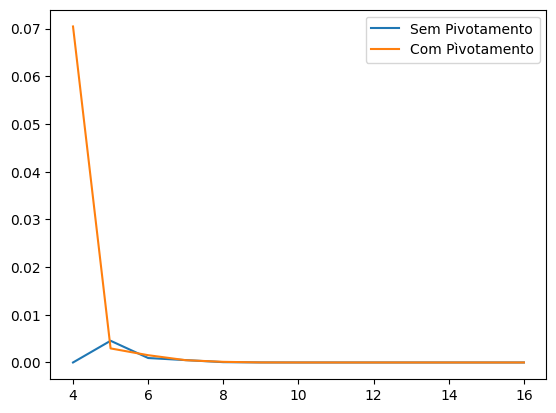

In [31]:
#Coloque aqui o seu código de teste do método implementado

import warnings
import matplotlib.pyplot as plt
warnings.simplefilter("ignore")

start_time = time.time()
A, b, a = meu_sistema_linear(20, magic_ilong)
x = elim_gauss(a)
tempo_orig = time.time() - start_time
print()

print("Solução", x[:10]) #imprime só alguns elementos da solução
print("\n\nResíduo max|b-Ax|: ", np.max(np.abs(b-A@x)), " Tempo que levou: ", tempo_orig, " segundos")
def func1 (sigfig):
    start_time = time.time()
    A, b, a = meu_sistema_linear(20, magic_ilong)
    x = elim_gauss_precisao_reduzida(a, sigfig)
    tempo_orig = time.time() - start_time
    print()
    erromax = np.max(np.abs(b-A@x))
    print("Solução", x[:10]) #imprime só alguns elementos da solução
    print("\n\nResíduo max|b-Ax|: ", erromax, " Tempo que levou: ", tempo_orig, " segundos")

    return erromax  

def func2 (sigfig):
    start_time = time.time()
    A, b, a = meu_sistema_linear(20, magic_ilong)
    x = elim_gauss_pivot_precisao_reduzida(a, sigfig)
    tempo_orig = time.time() - start_time
    print()
    erromax = np.max(np.abs(b-A@x))
    print("Solução", x[:10]) #imprime só alguns elementos da solução
    print("\n\nResíduo max|b-Ax|: ", erromax, " Tempo que levou: ", tempo_orig, " segundos")

    return erromax  
erro = [0]*13
for i in range(4,17):  #erro sem pivotamento
    erro[i-4]=func1(i)

x = np.linspace(4, 16, 13)
plt.plot(x, erro, label = 'Sem Pivotamento')

erro = [0]*13
for i in range(4,17): #erro com pivotamento
    erro[i-4]=func2(i)

x = np.linspace(4, 16, 13)
plt.plot(x, erro, label = 'Com Pìvotamento') 
print()
plt.legend()
plt.show()

Coloque aqui observações sobre o experimento realizado:

* A precisão da solução melhorou com o pivotamento?
* Será que para qualquer matriz o erro vai sempre melhorar?
* 🧩 Consegue ilustrar algum teste que o pivotamento não ajuda?

A precisao da solução se mostrou na mesma ordem de grandeza em todos os casos, o comportamento da curva de precisao com pivotamento eh o esperado.
O erro tende a melhorar dependendo do modulo da diagonal principal frente as colunas da matriz, exemplo, se a[i,i] for sempre o numero de maior modulo na coluna, nao se faz necessario o pivotamento da matriz. Casos que o pivotamento vá grar um 0 na diagonal tambem nao sao recomendados.




---



# ❗ Tarefa Final ❗


Queremos encontrar um polinômio de grau $n>0$,

$$ p_n(x) = a_0 + a_1 x + a_2 x^2 + ... + a_n x^n $$

de modo que 

$$ p_n(x_k) = y_k, \quad (0 \leq k \leq n), $$

em que os pares $(x_k, y_k)$ são dados e $x_k$ são distintos para diferentes $k$.

Para isso, escrevemos o sistema linear com $n+1$ equações, uma para cada par $(x_k, y_k)$

$$ p_n(x_k) = a_0 + a_1 x_k + a_2 x_k^2 + ... + a_n x_k^n = y_k, $$

que tem como incógnitas os $n+1$ coeficientes $a_j$, $j=0,1,...,n$.

A matriz do sistema resultante é conhecida como Matriz de Vandermonde (https://pt.wikipedia.org/wiki/Matriz_de_Vandermonde) e o problema em questão é um problema de interpolação (que veremos mais adiante no curso).


**Implementação**

Use o código que implementou de eliminação de Gauss com condensação pivotal com um certo número de digitos significativos fixados.

**Teste 1**

Teste o seu método resolvendo o sistema linear do problema descrito na tarefa considerando:

$$n = 5$$

$$x_k=k+1, \quad k=0,1,...,n$$

$$ y_k = x_k^6 - \text{magic_ishort} * x_k^5 $$

considerando 4, 8, 12 e 16 algarismos significativos.

Apresente em cada caso o valor do erro:

$$E = \max_{k=0,1,..,n}| p(x_k)-y_k | $$

In [47]:
#Coloque seus códigos aqui

# Entrada:
#  n: tamanho da mtriz
# Saída:
#   A: Matrix do sistema linear Ax=b
#   b: lado diretiro do sistema Ax=b
#   a: matriz aumentada [A|b]
def meu_sistema_linear2(n=5, magic_ilong=magic_ilong, cond_pow=8):
  # Tamanho do sistema
  #n = 5
  x = np.ones((n))
  b = np.ones((n))
  for i in range(n):
    x[i] = i+1                               # xk = k+1
    b[i] = x[i]**6-magic_ishort*x[i]**5      # yk = xk⁶- magic_ishort * xk⁵
  
  A = np.ones((n,n))
  for i in range(n):
      for j in range(1, n):
          A[i][j] = x[i]**j

  #Matrix aumentada aleatória a=[A|b]
  a = np.c_[A,b]

  return A, b, a

def func (sigfig):
    start_time = time.time()
    A, b, a = meu_sistema_linear2(5, magic_ilong)
    x = elim_gauss_pivot_precisao_reduzida(a, sigfig)
    tempo_orig = time.time() - start_time
    print()
    erromax = np.max(np.abs(b-A@x))
    print("Solução", x[:10]) #imprime só alguns elementos da solução
    print("\n\nResíduo max|b-Ax|: ", erromax, " Tempo que levou: ", tempo_orig, " segundos")

erro = [0]*13
for i in range(4,17,4): #erro com pivotamento
    erro[i-4]=func(i)


Solução [-293.5  767.  -781.5  408.  -116. ]


Resíduo max|b-Ax|:  4.0  Tempo que levou:  0.03450322151184082  segundos

Solução [-240.  668. -724.  395. -115.]


Resíduo max|b-Ax|:  0.0  Tempo que levou:  0.025412797927856445  segundos

Solução [-240.  668. -724.  395. -115.]


Resíduo max|b-Ax|:  0.0  Tempo que levou:  0.027426481246948242  segundos

Solução [-240.  668. -724.  395. -115.]


Resíduo max|b-Ax|:  0.0  Tempo que levou:  0.027318716049194336  segundos


Coloque sua resposta e comentários

Foi ultilizado para a resolução do exercicio o seguinte, primeiramente, foram montados os vetores x e b, sendo x o vetor com os valores de x e b o vetor com os valores de y dados do problema, ou seja, x seguia o modelo $$x_k=k+1, \quad k=0,1,...,n$$ e y o modelo $$ y_k = x_k^6 - \text{magic_ishort} * x_k^5 $$, para que entao o problema seja representado da forma Ax = b.

Do estudo do link sujetirido veio o que seria a matriz A,  A é a Matriz de Vandermonde para o caso de Interpolação polinomial, ou seja, segue o modelo ![image.png](https://wikimedia.org/api/rest_v1/media/math/render/svg/736ac4eed91bd6da3970a0d57f9b89b8858d70fe), sendo A a matriz da esquerda, entao, foi elaborada uma matriz nestes moldes. 

À partir dai foi ultilizado codigo de outros exercicios e o problema foi solucionado.

Pode-se tambem observar o comportamento do erro residual dado o travamento para uso de um certo numero de algarismo significativos, o valor com 4 algarismos apenas foi expressivo perto dos seguintes valores ultilizaos, dada a simplicidade do problema, com valores que nao vieram a se deteriorar muito e o tamanho da matriz (5 apenas), logo com 8 algarismos significativos ja foi zerado o erro dado a este fator, pois, os valores, inicialmente todos inteiros, e de ordem baixa, nao chegaram a requerer tanta precisao para ser computacionalmente manuzeados.